# Pràctica 8: Recommeder Systems

#### NOM: Miquel Monge Dalmau


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Recomenadors No Personalitzats **(20%)**
* B. Recomenadors k-NN **(30%)**
* C. Recomenadors SVD **(50%)**

## Datasets

#### MovieLens-Latest-Small

Farem ús de la base de dades de qualificacions de pel·lícules de [MovieLens](https://grouplens.org/datasets/movielens/). Existeixen varies mides del dataset. Per aprendre'n com funciona la base dels recomenadors, farem servir la versió petita. **Us l'heu de descarregar**:

- [Small](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip): 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. (Last updated 9/2018.). [Aqui](https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k) podeu veure els darrers articles publicats al respecte.

#### MovieLens-Latest
La última versió d'aquesta base de dades, **que no farem servir**, però posem com a referència
- [Full](http://files.grouplens.org/datasets/movielens/ml-latest.zip): 27,000,000 ratings and 1,100,000 tag applications applied to 58,000 movies by 280,000 users. Includes tag genome data with 14 million relevance scores across 1,100 tags. Last updated 9/2018.

#### Netflix Grand-Prize
Teniu una explicació del que va passar a la [wikipedia](https://en.wikipedia.org/wiki/Netflix_Prize). Les dades d'entrenament contenien 100,480,507 ratings de 480,189 usaris sobre 17,770 pelicules.

- [challenge 2006-2009](https://www.kaggle.com/netflix-inc/netflix-prize-data)

Com a orientació, les dades actuals de Netflix és de més de 150,000,000 d'usuaris i varis milers películes i sèries de televisió.



## Llibreria

Existeixen moltes llibreries i codis per a realitzar sistemes recomenadors. A continuació us en poso el que farem servir:

#### LensKit Python
- [LKPy](https://github.com/lenskit/lkpy)

Per instal·lar la versió actual, podeu fer servir Anaconda:

`conda install -c lenskit lenskit`

O amb pip:

`pip install lenskit`

#### Altres llibreries interessants
- [Surprise](http://surpriselib.com/) 5.1k stars a github. Molt popular.
- A la web, [paperswithcode](https://paperswithcode.com/), teniu codi actual utilitzat pels darreres grups de recerca en articles científics. Hi trobareu un recopilatori de repositoris i trobareu resumit un ranking dels mètodes per tal d'ajudar a la recerca. En el cas de [recomenadors](https://paperswithcode.com/task/recommendation-systems), podeu veure quina és la tendència actual.





## Introducció

En aquesta pràctica aprendrem sobre sistemes recomenadors, com són les dades, quins mètodes existeixen per a predir qualificacions (ratings) a pel·lícules, fer recomenacions basat en les qualificacions, i veure les diferents formes per evaluar-ho.

Actualment, són sistemes molt utilitzats i gairebé podriem dir que esencials, en diferents sectors online (e.g. YouTube videos, Netflix shows, Amazon products).

Podem veure-hi dues tendències:
<img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width="500px">
* **Content filtering**: les recomenacions provenen de descriure el contingut dels items i llavors recomenar items similars.
* **Collaborative filtering**: les recomenacions provenen de l'ús dels items pels clients, és a dir, trobar relacions entre quins items agraden a quins usuaris i recomenar aquells llavors.

També es poden distingir clarament dos tipus de formes d'extreure les qualificacions:
* **Explicit rating**: els usuaris posen nota o qualifiquen les pel·lícules segons el seu gust.
* **Implicit rating**: les qualificacions provenen de l'ús de l'usuari, sense que aquest hagi d'especificar si li agrada o no. És més fàcil d'aconseguir, però no es té un grau de certesa tan gran com en el cas anterior. Un exemple són els clicks en una botiga online, on es solen recomenar nous items segons el nostre historial de visualitzacions.


Per tal de fer-ho més interactiu, us comparteixo un fitxer amb algunes qualificacions d'un usuari: `user-movie-ratings.csv`. El que intentarem és trobar una pel·lícula a veure que pugui agradar tan a vosaltres com a l'usuri, per això, el primer que haureu de fer és **omplir la vostra pròpia llista de qualificacions** omplint el fitxe `my-movie-ratings.csv`. 

Els diferents apartats farán ús de diferents tipus de recomenacions:

* El primer apartat aplicarem recomenacions no personalitzades, és a dir, mètodes que no tinguin en compte el que ens agradi a nosaltres, sinó recomenacions genèriques basades amb el que li ha agradat als altres usuaris. Ens servirà com a baseline per si no es coneix res d'algun usuari (per exemple al principi quan es donen d'alta, o veure tendències globals)
  També aprendrem a com evaluar sistemes que tinguin en compte el ranking
* En el següent apartat, aplicarem mètodes de recomenació basats en k-NN. Hi aplicarem mètodes de filtratge colaboratiu User-User i Item-Item.
  <img src="https://miro.medium.com/max/1400/1*QvhetbRjCr1vryTch_2HZQ.jpeg" width="500">
  Aquí aplicarem mètodes que requereixin un aprenentatge sobre dades dels clients als que volem predir.
* Finalment, provarem mètodes basats en la factorització de matrius (SVD). A partir d'aquests, s'han desenvolupat la majories dels mètodes més utilitzats en la actualitat.
  <img src="https://miro.medium.com/max/5130/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="600">

Començarem descarregant el dataset, descomprimint-lo i [llegint les dades del dataset](https://lkpy.readthedocs.io/en/stable/datasets.html) (el contingut ha de trobar-se a *./ml-latest-small/*)

In [1]:
import lenskit.datasets as ds
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

data = ds.MovieLens('ml-latest-small/')
print("Successfully installed dataset.")

És important entendre com s’estructura un conjunt de dades i assegurar-se que el conjunt de dades s’importa correctament. Imprimim algunes files de les dades de classificació.

Com veieu, MovieLens emmagatzema el número d'identificació d'un usuari,
 l'identificador de l'element (en aquest cas, cada identificador és una pel·lícula diferent), la qualificació que l'usuari ha donat a aquest element ,
 i l'instant de temps de quan es va fer la qualificació.

In [2]:
data.ratings.timestamp = pd.to_datetime(data.ratings.timestamp, unit='s')
data.tags.timestamp = pd.to_datetime(data.tags.timestamp, unit='s')

display(data.ratings)  # user - item - rating - timestamp
display(data.movies)   # item - title - genre
display(data.tags)     # user - item - tag - timestamp
display(data.links)    # item - id of imdb - id of tmdb

,user,item,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


,user,item,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20
...,...,...,...,...
3678,606,7382,for katie,2007-02-11 22:46:59
3679,606,7936,austere,2007-03-08 22:18:54
3680,610,3265,gun fu,2017-05-03 20:39:44
3681,610,3265,heroic bloodshed,2017-05-03 20:39:38


,imdbId,tmdbId
item,,
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
...,...,...
193581,5476944,432131
193583,5914996,445030
193585,6397426,479308


Un aspecte important dels conjunts de dades del sistema de recomanacions és com gestionen les dades que falten.
Els sistemes de recomanació solen tenir MOLTES de dades que falten, perquè la majoria d’usuaris només valoren algunes pel·lícules i la majoria de pel·lícules només reben valoracions d’uns quants usuaris.

Per exemple, podem veure que l’usuari núm. 1 va proporcionar una qualificació de 4.0 a l’element número 1 i
que va proporcionar una qualificació de 4.0 a l’element núm. 3. Però no hi ha cap valoració per a l’element número 2,
cosa que significa que l’usuari núm. 1 mai no l’ha puntuat. És útil saber que aquest conjunt de dades no emmagatzema
cap element sense classificar, en lloc de, per exemple, emmagatzemar elements sense classificar com a valoracions a 0.

Però aquí tenim un altre petit problema: noms com el item 1 i el item 2 no són molt descriptius, de manera que no podem saber quines són aquestes pel·lícules. Afortunadament, MovieLens també té una taula de dades anomenada "movies" que inclou informació sobre títols i gèneres. Podem obtenir una visió més significativa d’aquestes dades unint els dos fitxers de dades.

In [3]:
joined_data = data.ratings.join(data.movies[['title', 'genres']], on='item')
display(joined_data)

,user,item,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi


Ara podem veure els títols i els gèneres de cada ítem.

Però també podem extreure informació de les pelicules com ara el promig de puntuacions, o el numero de puntuacions, ....


In [4]:
pelicules=joined_data.groupby("item").agg({"rating":"mean"}).join(data.movies['title'], on='item')
display(pelicules)

,rating,title
item,,
1,3.920930,Toy Story (1995)
2,3.431818,Jumanji (1995)
3,3.259615,Grumpier Old Men (1995)
4,2.357143,Waiting to Exhale (1995)
5,3.071429,Father of the Bride Part II (1995)
...,...,...
193581,4.000000,Black Butler: Book of the Atlantic (2017)
193583,3.500000,No Game No Life: Zero (2017)
193585,3.500000,Flint (2017)


## A. Recomenadors No Personalitzats (20%)

Ara que tenim puntuacions, creem conjunts genèrics de pel·lícules recomanades per a qualsevol espectador, sense conèixer els seus gustos.


A continuació posarem un exemple, a partir del que podeu crear altres búsquedes sobre el cataleg de pel·licules i ratings.

Algunes funcions de pandas que us poden ajudar:

* per ajuntar taules segons una columna, per exemple un id

  `.join(data.movies[['genres', 'title']], on='item')`


* per fer diferents tipus d'agregacions sobre les dades

  `.agg(count=('user', 'size'), rating=('rating', 'mean'), ..., title=('title', 'first'))`


* per convertir/codificar una columna de text en multiples columnes one-hot

  `.str.get_dummies('|')`  Ex: `data.movies['genres'].str.get_dummies()`


* per ordernar les files

  `.sort_values(by="rating")`
  
  
* per extreue el any del timestamp quan es va fer la qualificació
  
  `df['year_timestamp'] = df['timestamp'].dt.year`
  
* per extreure el any del titol (en cas que hi sigui)

  `df['year'] = df.Book.str.extract('\((\d{4})\)', expand=False)`
  

#### Preguntes

**Explica en cada una de les preguntes si el resultat es l'esperat o no**

1. Escull 5 pel·lícules al atzar i ordenales per puntuació
2. Mostra les 5 pel·lícules amb més puntuació
3. Mostra les 5 pel·lícules amb més quantitat de ratings
4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings <b>[*]()</b>
5. Mostra (any a any) les pel·lícules amb més puntuació <b>[*]()</b>
6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings <b>[*]()</b>
7. Inventa una altra forma de escollir pel·lícules.

#### Respostes

#### 1. Escull 5 pel·lícules al atzar i ordenales per puntuació

In [5]:
def sort_by_rating(db):
    movies_ratings = db.groupby("item").agg({"rating":"mean"})
    sorted_ratings = movies_ratings.sort_values(by = "rating", ascending = False)
    sorted_movies = sorted_ratings.join(data.movies['title'], on='item')
    
    return sorted_movies

In [6]:
n_movies = 5

five_movies = joined_data.sample(n_movies, random_state = 0)
five_movies_sorted = sort_by_rating(five_movies)
five_movies_sorted

,rating,title
item,,
780,5.0,Independence Day (a.k.a. ID4) (1996)
60291,4.0,Gonzo: The Life and Work of Dr. Hunter S. Thom...
3448,3.0,"Good Morning, Vietnam (1987)"
1320,2.5,Alien³ (a.k.a. Alien 3) (1992)
7624,2.5,School Ties (1992)


#### 2. Mostra les 5 pel·lícules amb més puntuació

In [7]:
sorted_ratings = sort_by_rating(joined_data)
top_5 = sorted_ratings.head(n_movies)
top_5

,rating,title
item,,
88448,5.0,Paper Birds (Pájaros de papel) (2010)
100556,5.0,"Act of Killing, The (2012)"
143031,5.0,Jump In! (2007)
143511,5.0,Human (2015)
143559,5.0,L.A. Slasher (2015)


#### 3. Mostra les 5 pel·lícules amb més quantitat de ratings

In [8]:
def most_rated(db):
    most_rated = joined_data.groupby("item").agg({"rating":"size"})
    most_rated_sorted = most_rated.sort_values(by = "rating", ascending = False)
    most_rated_movies = most_rated_sorted.join(data.movies['title'], on = 'item')

    return most_rated_movies

In [9]:
most_rated_movies = most_rated(joined_data)
most_rated_movies.head(n_movies)

,rating,title
item,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"


#### 4. Mostra les 5 pel·lícules amb més puntuació amb almenys 50 ratings <b>[*]()</b> 

In [10]:
minimum_50_ratings = most_rated_movies[most_rated_movies['rating'] >= 50]               # agafem només aquelles amb mínim 50 ratings
minimum_50_ratings.rename(columns = {'rating':'rating_count'}, inplace = True)          # modifiquem nom rating per rating count (número de ratings)
minimum_50_ratings = minimum_50_ratings.join(sorted_ratings['rating'], on = 'item')     # afegim la columna rating (mitjana dels ratings)

minimum_50_ratings_sorted = sort_by_rating(minimum_50_ratings)                          # Ordenem segons rating
top_5_minimum_50_ratings_sorted = minimum_50_ratings_sorted.head(n_movies)              # agafem top 5
top_5_minimum_50_ratings_sorted

,rating,title
item,,
318,4.429022,"Shawshank Redemption, The (1994)"
858,4.289062,"Godfather, The (1972)"
2959,4.272936,Fight Club (1999)
1276,4.271930,Cool Hand Luke (1967)
750,4.268041,Dr. Strangelove or: How I Learned to Stop Worr...


#### 5. Mostra (any a any) les pel·lícules amb més puntuació <b>[*]()</b>


In [11]:
joined_data['year_timestamp'] = joined_data['timestamp'].dt.year    # agefim any al df
most_rated_by_year = joined_data.groupby("year_timestamp")          # agrupem per anys

# Per cada any, agafem les 5 pelicules amb més rating
for year, item in most_rated_by_year:
    sorted_ratings_by_year = sort_by_rating(item).head(n_movies)
    print(f'Any [{year}]:')
    display(sorted_ratings_by_year)

Any [1996]:


,rating,title
item,,
5060,5.0,M*A*S*H (a.k.a. MASH) (1970)
1057,5.0,Everyone Says I Love You (1996)
28,5.0,Persuasion (1995)
800,5.0,Lone Star (1996)
720,5.0,Wallace & Gromit: The Best of Aardman Animatio...


Any [1997]:


,rating,title
item,,
265,5.0,Like Water for Chocolate (Como agua para choco...
85,5.0,Angels and Insects (1995)
467,5.0,Live Nude Girls (1995)
485,5.0,Last Action Hero (1993)
886,5.0,Bulletproof (1996)


Any [1998]:


,rating,title
item,,
1376,5.0,Star Trek IV: The Voyage Home (1986)
954,5.0,Mr. Smith Goes to Washington (1939)
440,5.0,Dave (1993)
1066,5.0,Shall We Dance (1937)
1719,5.0,"Sweet Hereafter, The (1997)"


Any [1999]:


,rating,title
item,,
2806,5.0,Teaching Mrs. Tingle (1999)
1673,5.0,Boogie Nights (1997)
613,5.0,Jane Eyre (1996)
2843,5.0,"Black Cat, White Cat (Crna macka, beli macor) ..."
1683,5.0,"Wings of the Dove, The (1997)"


Any [2000]:


,rating,title
item,,
6460,5.0,"Trial, The (Procès, Le) (1962)"
1949,5.0,"Man for All Seasons, A (1966)"
1797,5.0,Everest (1998)
1809,5.0,Fireworks (Hana-bi) (1997)
1904,5.0,Henry Fool (1997)


Any [2001]:


,rating,title
item,,
6460,5.0,"Trial, The (Procès, Le) (1962)"
370,5.0,Naked Gun 33 1/3: The Final Insult (1994)
2565,5.0,"King and I, The (1956)"
2532,5.0,Conquest of the Planet of the Apes (1972)
2531,5.0,Battle for the Planet of the Apes (1973)


Any [2002]:


,rating,title
item,,
3831,5.0,Saving Grace (2000)
317,5.0,"Santa Clause, The (1994)"
2106,5.0,Swing Kids (1993)
4873,5.0,Waking Life (2001)
4878,5.0,Donnie Darko (2001)


Any [2003]:


,rating,title
item,,
4450,5.0,Bully (2001)
1663,5.0,Stripes (1981)
4345,5.0,"Anniversary Party, The (2001)"
2069,5.0,"Trip to Bountiful, The (1985)"
2073,5.0,Fandango (1985)


Any [2004]:


,rating,title
item,,
5377,5.0,About a Boy (2002)
7034,5.0,Show Me Love (Fucking Åmål) (1998)
5915,5.0,Victory (a.k.a. Escape to Victory) (1981)
7381,5.0,"Whole Ten Yards, The (2004)"
4406,5.0,"Man Who Shot Liberty Valance, The (1962)"


Any [2005]:


,rating,title
item,,
6086,5.0,"I, the Jury (1982)"
5867,5.0,Thief (1981)
2648,5.0,Frankenstein (1931)
5992,5.0,"Hours, The (2002)"
2739,5.0,"Color Purple, The (1985)"


Any [2006]:


,rating,title
item,,
6368,5.0,Cinemania (2002)
33138,5.0,Palindromes (2004)
31364,5.0,Memories of Murder (Salinui chueok) (2003)
27523,5.0,My Sassy Girl (Yeopgijeogin geunyeo) (2001)
27397,5.0,Joint Security Area (Gongdong gyeongbi guyeok ...


Any [2007]:


,rating,title
item,,
5690,5.0,Grave of the Fireflies (Hotaru no haka) (1988)
26171,5.0,Play Time (a.k.a. Playtime) (1967)
994,5.0,Big Night (1996)
1244,5.0,Manhattan (1979)
2010,5.0,Metropolis (1927)


Any [2008]:


,rating,title
item,,
5992,5.0,"Hours, The (2002)"
267,5.0,Major Payne (1995)
4361,5.0,Tootsie (1982)
1257,5.0,Better Off Dead... (1985)
6270,5.0,Akira Kurosawa's Dreams (Dreams) (1990)


Any [2009]:


,rating,title
item,,
1104,5.0,"Streetcar Named Desire, A (1951)"
1100,5.0,Days of Thunder (1990)
2303,5.0,Nashville (1975)
965,5.0,"39 Steps, The (1935)"
5377,5.0,About a Boy (2002)


Any [2010]:


,rating,title
item,,
1734,5.0,My Life in Pink (Ma vie en rose) (1997)
1202,5.0,Withnail & I (1987)
6611,5.0,Umberto D. (1952)
288,5.0,Natural Born Killers (1994)
3100,5.0,"River Runs Through It, A (1992)"


Any [2011]:


,rating,title
item,,
1228,5.0,Raging Bull (1980)
7147,5.0,Big Fish (2003)
4518,5.0,The Lair of the White Worm (1988)
4406,5.0,"Man Who Shot Liberty Valance, The (1962)"
1212,5.0,"Third Man, The (1949)"


Any [2012]:


,rating,title
item,,
779,5.0,'Til There Was You (1997)
4956,5.0,"Stunt Man, The (1980)"
61026,5.0,Red Cliff (Chi bi) (2008)
1215,5.0,Army of Darkness (1993)
932,5.0,"Affair to Remember, An (1957)"


Any [2013]:


,rating,title
item,,
8132,5.0,Gladiator (1992)
1246,5.0,Dead Poets Society (1989)
7143,5.0,"Last Samurai, The (2003)"
2706,5.0,American Pie (1999)
44665,5.0,Lucky Number Slevin (2006)


Any [2014]:


,rating,title
item,,
2278,5.0,Ronin (1998)
2810,5.0,Perfect Blue (1997)
112512,5.0,Colourful (Karafuru) (2010)
86882,5.0,Midnight in Paris (2011)
6442,5.0,Belle époque (1992)


Any [2015]:


,rating,title
item,,
91077,5.0,"Descendants, The (2011)"
69134,5.0,Antichrist (2009)
3727,5.0,Near Dark (1987)
910,5.0,Some Like It Hot (1959)
3687,5.0,Light Years (Gandahar) (1988)


Any [2016]:


,rating,title
item,,
100906,5.0,Maniac Cop 2 (1990)
115122,5.0,What We Do in the Shadows (2014)
5772,5.0,My Dinner with André (1981)
8869,5.0,First Daughter (2004)
115727,5.0,Crippled Avengers (Can que) (Return of the 5 D...


Any [2017]:


,rating,title
item,,
60333,5.0,Encounters at the End of the World (2008)
141718,5.0,Deathgasm (2015)
108795,5.0,Wonder Woman (2009)
64501,5.0,Che: Part Two (2008)
111659,5.0,Maleficent (2014)


Any [2018]:


,rating,title
item,,
140265,5.0,George Carlin: Jammin' in New York (1992)
130970,5.0,George Carlin: Life Is Worth Losing (2005)
67788,5.0,Confessions of a Shopaholic (2009)
37731,5.0,Green Street Hooligans (a.k.a. Hooligans) (2005)
163386,5.0,Winnie the Pooh and the Day of Concern (1972)


#### 6. Mostra per categories, les 5 pel·lícules amb més puntuació i almenys 10 ratings <b>[*]()</b>

In [12]:
minimum_10_ratings = most_rated_movies[most_rated_movies['rating'] >= 10]                           # agafem només aquelles amb mínim 10 ratings
minimum_10_ratings_genres = minimum_10_ratings.join(data.movies['genres'], on = 'item')             # agefim els gèneres per a cada pelicula
minimum_10_ratings_genres.rename(columns = {'rating':'rating_count'}, inplace = True)               # posem el número de ratings a la columna --> rating_count
genres = list((minimum_10_ratings_genres['genres'].str.get_dummies('|')).columns)                   # llista amb els gèneres 
minimum_10_ratings_genres = minimum_10_ratings_genres.join(sorted_ratings['rating'], on = 'item')   # afegim el rating per a cada pelicula

# Per a cada gènere mostrem les 5 pelicules amb més puntuació
for genre in genres:                                                                    
    print(f'Gènere: [{genre}]')
    df_genre = minimum_10_ratings_genres.loc[minimum_10_ratings_genres['genres'].str.contains(genre)]
    df_genre = df_genre.sort_values(by = 'rating', ascending = False)
    display(df_genre.head(n_movies))

Gènere: [Action]


,rating_count,title,genres,rating
item,,,,
1927,10,All Quiet on the Western Front (1930),Action|Drama|War,4.350000
1209,18,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,4.305556
55721,10,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller,4.300000
168252,25,Logan (2017),Action|Sci-Fi,4.280000
2959,218,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936


Gènere: [Adventure]


,rating_count,title,genres,rating
item,,,,
1204,45,Lawrence of Arabia (1962),Adventure|Drama|War,4.300000
3508,18,"Outlaw Josey Wales, The (1976)",Action|Adventure|Drama|Thriller|Western,4.250000
1197,142,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394
260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076
3030,13,Yojimbo (1961),Action|Adventure,4.230769


Gènere: [Animation]


,rating_count,title,genres,rating
item,,,,
3429,12,Creature Comforts (1989),Animation|Comedy,4.250000
71899,10,Mary and Max (2009),Animation|Comedy|Drama,4.200000
55442,11,Persepolis (2007),Animation|Drama,4.181818
5690,16,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War,4.156250
5618,87,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,4.155172


Gènere: [Children]


,rating_count,title,genres,rating
item,,,,
3213,13,Batman: Mask of the Phantasm (1993),Animation|Children,4.115385
78499,55,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,4.109091
1223,28,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi,4.089286
72226,18,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime,4.083333
6350,24,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,Action|Adventure|Animation|Children|Fantasy|Sc...,4.062500


Gènere: [Comedy]


,rating_count,title,genres,rating
item,,,,
951,14,His Girl Friday (1940),Comedy|Romance,4.392857
905,14,It Happened One Night (1934),Comedy|Romance,4.321429
898,29,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,4.310345
176,13,Living in Oblivion (1995),Comedy,4.307692
92535,10,Louis C.K.: Live at the Beacon Theater (2011),Comedy,4.300000


Gènere: [Crime]


,rating_count,title,genres,rating
item,,,,
318,317,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022
3435,17,Double Indemnity (1944),Crime|Drama|Film-Noir,4.323529
55721,10,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller,4.300000
858,192,"Godfather, The (1972)",Crime|Drama,4.289062
2959,218,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936


Gènere: [Documentary]


,rating_count,title,genres,rating
item,,,,
7156,13,Fog of War: Eleven Lessons from the Life of Ro...,Documentary|War,4.307692
246,29,Hoop Dreams (1994),Documentary,4.293103
80906,12,Inside Job (2010),Documentary,4.291667
162,17,Crumb (1994),Documentary,4.205882
77455,13,Exit Through the Gift Shop (2010),Comedy|Documentary,4.038462


Gènere: [Drama]


,rating_count,title,genres,rating
item,,,,
1041,11,Secrets & Lies (1996),Drama,4.590909
3451,11,Guess Who's Coming to Dinner (1967),Drama,4.545455
1178,12,Paths of Glory (1957),Drama|War,4.541667
1104,20,"Streetcar Named Desire, A (1951)",Drama,4.475000
2360,12,"Celebration, The (Festen) (1998)",Drama,4.458333


Gènere: [Fantasy]


,rating_count,title,genres,rating
item,,,,
1197,142,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394
1199,59,Brazil (1985),Fantasy|Sci-Fi,4.177966
1136,136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.161765
122926,16,Untitled Spider-Man Reboot (2017),Action|Adventure|Fantasy,4.156250
5618,87,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,4.155172


Gènere: [Film-Noir]


,rating_count,title,genres,rating
item,,,,
922,27,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,4.333333
3435,17,Double Indemnity (1944),Crime|Drama|Film-Noir,4.323529
1248,17,Touch of Evil (1958),Crime|Film-Noir|Thriller,4.264706
930,20,Notorious (1946),Film-Noir|Romance|Thriller,4.250000
1212,24,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,4.229167


Gènere: [Horror]


,rating_count,title,genres,rating
item,,,,
2160,32,Rosemary's Baby (1968),Drama|Horror|Thriller,4.171875
593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290
1258,109,"Shining, The (1980)",Horror,4.082569
1241,10,Dead Alive (Braindead) (1992),Comedy|Fantasy|Horror,4.050000
1261,34,Evil Dead II (Dead by Dawn) (1987),Action|Comedy|Fantasy|Horror,4.044118


Gènere: [IMAX]


,rating_count,title,genres,rating
item,,,,
58559,149,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255
78499,55,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,4.109091
79132,143,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.066434
105504,21,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX,4.047619
91529,76,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,3.993421


Gènere: [Musical]


,rating_count,title,genres,rating
item,,,,
4642,11,Hedwig and the Angry Inch (2000),Comedy|Drama|Musical,4.181818
2565,12,"King and I, The (1956)",Drama|Musical|Romance,4.166667
918,10,Meet Me in St. Louis (1944),Musical,4.100000
899,47,Singin' in the Rain (1952),Comedy|Musical|Romance,4.074468
54190,11,Across the Universe (2007),Drama|Fantasy|Musical|Romance,4.045455


Gènere: [Mystery]


,rating_count,title,genres,rating
item,,,,
904,84,Rear Window (1954),Mystery|Thriller,4.261905
50,204,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745
1212,24,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,4.229167
933,23,To Catch a Thief (1955),Crime|Mystery|Romance|Thriller,4.217391
1252,59,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,4.211864


Gènere: [Romance]


,rating_count,title,genres,rating
item,,,,
951,14,His Girl Friday (1940),Comedy|Romance,4.392857
922,27,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,4.333333
905,14,It Happened One Night (1934),Comedy|Romance,4.321429
898,29,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,4.310345
1235,26,Harold and Maude (1971),Comedy|Drama|Romance,4.288462


Gènere: [Sci-Fi]


,rating_count,title,genres,rating
item,,,,
168252,25,Logan (2017),Action|Sci-Fi,4.280000
260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076
1196,211,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.215640
2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446
1199,59,Brazil (1985),Fantasy|Sci-Fi,4.177966


Gènere: [Thriller]


,rating_count,title,genres,rating
item,,,,
55721,10,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller,4.300000
2959,218,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936
1248,17,Touch of Evil (1958),Crime|Film-Noir|Thriller,4.264706
904,84,Rear Window (1954),Mystery|Thriller,4.261905
48516,107,"Departed, The (2006)",Crime|Drama|Thriller,4.252336


Gènere: [War]


,rating_count,title,genres,rating
item,,,,
1178,12,Paths of Glory (1957),Drama|War,4.541667
1217,15,Ran (1985),Drama|War,4.433333
1927,10,All Quiet on the Western Front (1930),Action|Drama|War,4.350000
7156,13,Fog of War: Eleven Lessons from the Life of Ro...,Documentary|War,4.307692
1204,45,Lawrence of Arabia (1962),Adventure|Drama|War,4.300000


Gènere: [Western]


,rating_count,title,genres,rating
item,,,,
1209,18,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western,4.305556
3508,18,"Outlaw Josey Wales, The (1976)",Action|Adventure|Drama|Thriller|Western,4.250000
1283,19,High Noon (1952),Drama|Western,4.210526
2921,11,High Plains Drifter (1973),Western,4.181818
800,19,Lone Star (1996),Drama|Mystery|Western,4.157895


#### 7. Inventa una altra forma de escollir pel·lícules.

Pel·lícules d'acció amb una valoració mitjana entre [3.5 - 4] i mínim 40 ratings (ordenades per rating).

In [13]:
genre_querie = 'Action'
minimum_40_ratings = most_rated_movies[most_rated_movies['rating'] >= 40]                           # agafem només aquelles amb mínim 10 ratings
minimum_40_ratings_genres = minimum_40_ratings.join(data.movies['genres'], on = 'item')             # agefim els gèneres per a cada pelicula
minimum_40_ratings_genres.rename(columns = {'rating':'rating_count'}, inplace = True)               # posem el número de ratings a la columna --> rating_count
minimum_40_ratings_genres = minimum_40_ratings_genres.join(sorted_ratings['rating'], on = 'item')   # afegim el rating per a cada pelicula


print(f'Gènere: [{genre_querie}]')
movies_rating_between_4_5 = minimum_40_ratings_genres[(minimum_40_ratings_genres['rating'] >= 3.5) & (minimum_40_ratings_genres['rating'] <= 4)]
df_genre_action = movies_rating_between_4_5.loc[minimum_40_ratings_genres['genres'].str.contains(genre_querie)]
df_genre_action = df_genre_action.sort_values(by = 'rating', ascending = False)
display(df_genre_action)

Gènere: [Action]


,rating_count,title,genres,rating
item,,,,
51255,61,Hot Fuzz (2007),Action|Comedy|Crime|Mystery,4.000000
2692,75,Run Lola Run (Lola rennt) (1998),Action|Crime,4.000000
91529,76,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,3.993421
81834,47,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,3.989362
60684,43,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,3.988372
...,...,...,...,...
377,171,Speed (1994),Action|Romance|Thriller,3.529240
2278,43,Ronin (1998),Action|Crime|Thriller,3.523256
77561,47,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX,3.510638


## B. Recomenadors k-NN (30%)

Fins ara hem trobat pel·lícules basades en cerques i aplicant filtres al contingut dels items, sense conèixer res dels nostres gustos o dels gustos de la resta d'usuaris que han qualificat una pel·lícula. En aquest apartat, buscarem pel·lícules basant-nos en el historial i les qualificacions dels usuaris, i amb aquest coneixement en traurem les pel·lícules rellevants. Per aquest motiu se'n anomenen **filtres colaboratius**.

#### Models
Veurem els models que apareixen a la llibreria de LensKit, i utilitzarem els següents metodes:
* [**Bias**](https://lkpy.readthedocs.io/en/stable/bias.html): Tot i no tractar-se d'un mètode colaboratiu perse, ens pot servir com a baseline. El model bàsic prediu $s$ fent servir $s(u,i) = \mu + b_i + b_u$, on $\mu$ és el score promig de tot el dataset, $b_i$ és el residual promig del item $i$, i  $b_u$ és el bias de usuari, que es calcula com el residual promig de les prediccions del usuari $u$. A la documentació veureu clarament la notació. Veureu que conté un parametre de `damping` (amortiment) que es pot interpretar que està amortint els usuaris i elements amb poca informació cap a una mitjana global en lloc de permetre’ls prendre valors extrems basats en poques valoracions.

* [**ItemItem**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.item_knn): Aquest algorisme agrupa els items similars en funció de les valoracions que els usuaris han fet de elles. Inventat per Amazon el 1998. Està pensat per ser un mètode eficient quan les nostres dades contenen més usuaris que items. Amb més usuaris que elements, cada item sol tenir més puntuacions que cada usuari, de manera que la puntuació mitjana d’un article normalment no canvia tan ràpidament. Això condueix a distribucions de classificació més estables, de manera que no cal reconstruir-lo amb tanta freqüència.

* [**UserUser**](https://lkpy.readthedocs.io/en/stable/knn.html#module-lenskit.algorithms.user_knn): Aquest algorisme agrupa usuaris similars en funció de les seves valoracions de pel·lícules. Té parametres guiant com l'algoritme decideix si un grup concret d'usuaris hauria de ser agrupat mitjançant l'establiment d'una mida de veinatge mínima i màxima. Els clústers realment petits representen grups de persones que no són molt similars a molts altres. Així, mantenint la mida del clúster petit, veurem més recomanacions poc convencionals. Però si augmentem la mida mínima del clúster, probablement es donaran recomanacions més populars convencionalment. Els "millors" valors depenen del que vulguem que es comporti el sistema de recomanació AI. Volem sorprendre amb recomanacions que d’altra manera no sabrien? O busquen una expressió de qualitat més segura?





En aquest apartat farem aquests models explicats a classe per tal de buscar quines pel·lícules podràn agradar més a tu i un usuari concret. Per això, farem ús dels fitxers: `user-movie-ratings.csv` i `my-movie-ratings.csv` (que l'heu d'omplir amb N qualificacions de pel·lícules que hagueu vist).

In [14]:
pd_user_movie_ratings = pd.read_csv('user-movie-ratings.csv', delimiter=";").dropna().set_index("item")
pd_my_movie_ratings = pd.read_csv('my-movie-ratings.csv', delimiter=";").dropna().set_index("item")
display(pd_my_movie_ratings["ratings"])

item
2571      5.0
260       4.5
480       3.5
589       3.5
527       5.0
         ... 
74789     4.0
115713    2.5
88744     3.0
94864     3.5
122892    4.0
Name: ratings, Length: 82, dtype: float64

In [15]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular, Bias
num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

recom = Popular()
recom = Recommender.adapt(recom)
recom.fit(data.ratings)

print("Set up a Popular algorithm!")

Set up a Popular algorithm!


In [16]:
# Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, 
# while num_recs is how many recommendations it should generate
user_recs_popular = recom.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_user_movie_ratings["ratings"]) 
display(user_recs_popular)
item=318
print(f'L\'item {item} té {(data.ratings["item"]==item).sum()} valoracions.')

,item,score
0,318,317.0
1,593,279.0
2,260,251.0
3,589,224.0
4,1196,211.0
5,2858,204.0
6,47,203.0
7,780,202.0
8,150,201.0
9,4993,198.0


L'item 318 té 317 valoracions.


In [17]:
print("POPULAR")
display(user_recs_popular.join(data.movies[['genres', 'title']], on='item'))


POPULAR


,item,score,genres,title
0,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
1,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
2,260,251.0,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3,589,224.0,Action|Sci-Fi,Terminator 2: Judgment Day (1991)
4,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
5,2858,204.0,Drama|Romance,American Beauty (1999)
6,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
7,780,202.0,Action|Adventure|Sci-Fi|Thriller,Independence Day (a.k.a. ID4) (1996)
8,150,201.0,Adventure|Drama|IMAX,Apollo 13 (1995)
9,4993,198.0,Adventure|Fantasy,"Lord of the Rings: The Fellowship of the Ring,..."


#### Preguntes

1. Instancia i aprèn els models Populars, Bias, ItemItem-knn <b>[*]()</b> i UserUser-knn <b>[*]()</b>. Explica els paràmetres que tenen aquests models.
2. Fés prediccions amb el teu perfil d'usuari  `my-movie-ratings.csv` amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 
3. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú entre els usuaris "user" i el vostre perfil (usat en el punt anterior)?
4. Com podriem fer per obtenir recomenacions conjuntes? <b>[*]()</b>

#### Respostes

#### 1. Instancia i aprèn els models Populars, Bias, ItemItem-knn <b>[*]()</b> i UserUser-knn <b>[*]()</b>. Explica els paràmetres que tenen aquests models.

#### Popular

In [18]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.basic import Popular

popular = Popular()
popular = Recommender.adapt(popular)
popular.fit(data.ratings)

#### Bias

In [19]:
from lenskit.algorithms.basic import Bias

bias_model = Bias()
bias_model = Recommender.adapt(bias_model)
bias_model.fit(data.ratings)

#### Item-item-knn

In [20]:
from lenskit.algorithms import item_knn

item = item_knn.ItemItem(10)
item = Recommender.adapt(item)
item.fit(data.ratings)

Numba is using threading layer omp - consider TBB
BLAS using multiple threads - can cause oversubscription
found 2 potential runtime problems - see https://boi.st/lkpy-perf


#### User-user-knn

In [21]:
from lenskit.algorithms import user_knn

user = user_knn.UserUser(10)
user = Recommender.adapt(user)
user.fit(data.ratings)

#### Explica els paràmetres que tenen aquests models.

POPULAR

Aquest model et recomana les pel·lícules més populars. Pot rebre per paràmetre un **selector**, tot i que per defecte és None i crea un _UnratedItemCandidateSelector_ (Un _CandidateSelector_ que selecciona els elements que encara no s'han classificat per l'usuari. Quan aquest selector s'ajusta, memoritza els elements classificats).

BIAS

Aquest model et recomana pel·lícules a través del bias de l'element i de l'usuari. S'implementa aquest algoritme predictor: s(u,i) = m + bi + bu, és a dir, la suma de la mitja global, el bias per element i el bias per usuari. El primer terme es calcula sumant tots els ratings i dividint pel nombre total de valoracions, el segon terme es calcula fent la resta entre una valoració d'un usuari en concret menys la mitja, tot això dividit pel nombre total de ratings d'aquesta pel·lícula. De forma opcional es pot incloure un valor de dumping per tal d'esmorteir el resultat final (si només 1 usuari ha valorat una pel·lícula amb un 1 no és el mateix que entre 10 usuaris la valoració mitjana sigui un 1). L'últim terme es calcula fent la resta entre la valoració concreta d'una pel·lícula d'un usuari menys la mitja menys el bias per aquest element (segon element de la suma de l'algoritme). De la mateixa manera que anteriorment en el denominador es pot sumar un factor damping.
Els paràmetres que rep són dos booleans (**items** i **users**) que marquen si es calcula el bias per item i/o per usuari, per defecte estan marcats a True i també un factor de **damping** que per defecte es troba a 0.0 i pot ser un valor o una tupla, depenent de si vols que s'apliqui el mateix per a item i users o no.

ITEMITEM

Aquest model utilitza el filtratge colaboratiu d'elements veïns més propers amb classificacions. Rep per paràmetre:
- **nbrs** - nombre màxim de veïns per puntuar cada element
- **min_nbrs** - nombre mínim de veïns per puntuar cada element
- **min_sim** - llindar mínim de similitud per tal de considerar un veí
- **save_nbrs** - nombre de veïns per guardar de cada element
- **center** - si s'han de normalitzar o no els vectors de classificació (booleà)
- **aggregate** - el tipus d'agregació (pot ser _weighted-average_ o _sum_ )

USERUSER

Molt similar a l'anterior. Aquest model fa servir el filtratge col·laboratiu d'usuaris veïns més propers amb classificacions. Rep per paràmetre:
- **nbrs** - nombre màxim de veïns per puntuar cada element
- **min_nbrs** - nombre mínim de veïns per puntuar cada element
- **min_sim** - llindar mínim de similitud per tal de considerar un veí
- **center** - si s'han de normalitzar o no els vectors de classificació (booleà)
- **aggregate** - el tipus d'agregació (pot ser _weighted-average_ o _sum_ )

#### 2. Fés prediccions amb el teu perfil d'usuari  `my-movie-ratings.csv` amb els models anteriors. Modifica els parametres i mostra quina influència tenen sobre els resultats. 

In [22]:
# Popular
my_recs_popular = popular.recommend(-1, 
                                    num_recs, 
                                    ratings = pd_my_movie_ratings["ratings"]) 

my_popular = my_recs_popular.join(data.movies[['genres', 'title']], on='item')

print("POPULAR")
display(my_popular)

POPULAR


,item,score,genres,title
0,356,329.0,Comedy|Drama|Romance|War,Forrest Gump (1994)
1,318,317.0,Crime|Drama,"Shawshank Redemption, The (1994)"
2,296,307.0,Comedy|Crime|Drama|Thriller,Pulp Fiction (1994)
3,593,279.0,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)"
4,110,237.0,Action|Drama|War,Braveheart (1995)
5,2959,218.0,Action|Crime|Drama|Thriller,Fight Club (1999)
6,1196,211.0,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
7,50,204.0,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"
8,2858,204.0,Drama|Romance,American Beauty (1999)
9,47,203.0,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)


In [23]:
# Bias
my_recs_bias = bias_model.recommend(-1, 
                                    num_recs, 
                                    ratings = pd_my_movie_ratings["ratings"]) 

my_bias = my_recs_bias.join(data.movies[['genres', 'title']], on='item')
print("Bias")
display(my_bias)

Bias


,item,score,genres,title
0,53,4.584038,Adventure|Drama,Lamerica (1994)
1,99,4.584038,Documentary,Heidi Fleiss: Hollywood Madam (1995)
2,148,4.584038,Drama,"Awfully Big Adventure, An (1995)"
3,467,4.584038,Comedy,Live Nude Girls (1995)
4,495,4.584038,Drama,In the Realm of the Senses (Ai no corrida) (1976)
5,496,4.584038,Comedy|Drama|Romance|Thriller,What Happened Was... (1994)
6,626,4.584038,Comedy,"Thin Line Between Love and Hate, A (1996)"
7,633,4.584038,Comedy,Denise Calls Up (1995)
8,876,4.584038,Action|Comedy|Crime|Thriller,Supercop 2 (Project S) (Chao ji ji hua) (1993)
9,1140,4.584038,Drama,Entertaining Angels: The Dorothy Day Story (1996)


In [24]:
# itemitem
my_recs_item = item.recommend(-1, 
                            num_recs, 
                            ratings=pd_my_movie_ratings["ratings"]) 

my_item = my_recs_item.join(data.movies[['genres', 'title']], on = 'item')
print("ItemItem")
display(my_item)

ItemItem


,item,score,genres,title
0,5181,5.207502,Action|Sci-Fi|Thriller,Hangar 18 (1980)
1,389,5.054455,Drama|Romance|War,"Colonel Chabert, Le (1994)"
2,4273,4.981822,Drama,Under the Sand (2000)
3,31364,4.969186,Crime|Drama|Mystery|Thriller,Memories of Murder (Salinui chueok) (2003)
4,185135,4.942661,Crime,Sherlock - A Study in Pink (2010)
5,174053,4.898406,Drama|Horror|Mystery|Sci-Fi|Thriller,Black Mirror: White Christmas (2014)
6,3855,4.892437,Drama|Romance,"Affair of Love, An (Liaison pornographique, Un..."
7,177593,4.871752,Crime|Drama,"Three Billboards Outside Ebbing, Missouri (2017)"
8,3302,4.856825,Comedy,Beautiful People (1999)
9,4298,4.856535,Crime|Film-Noir|Thriller,Rififi (Du rififi chez les hommes) (1955)


In [25]:
# useruser
my_recs_user = user.recommend(-1, 
                            num_recs, 
                            ratings = pd_my_movie_ratings["ratings"]) 

my_user = my_recs_user.join(data.movies[['genres', 'title']], on = 'item')
print("UserUser")
display(my_user)

UserUser


,item,score,genres,title
0,2769,5.614933,Crime|Drama,"Yards, The (2000)"
1,3200,5.477403,Comedy|Drama,"Last Detail, The (1973)"
2,136850,5.453606,Crime|Drama|Thriller,Villain (1971)
3,25947,5.331690,Comedy,Unfaithfully Yours (1948)
4,26326,5.331690,Drama,"Holy Mountain, The (Montaña sagrada, La) (1973)"
5,2314,5.321220,Drama,Beloved (1998)
6,7842,5.302995,Drama|Fantasy|Sci-Fi,Dune (2000)
7,3379,5.181121,Drama,On the Beach (1959)
8,68945,5.181121,Action|Animation|Mystery|Sci-Fi,Neon Genesis Evangelion: Death & Rebirth (Shin...
9,3814,5.170515,Comedy,Love and Death (1975)


In [28]:
df_models_my = my_popular.join(my_bias, lsuffix = '_popular', rsuffix = '_bias')
df_models_my = df_models_my.join(my_item, lsuffix = '', rsuffix = '_item')
df_models_my = df_models_my.join(my_user, lsuffix = '', rsuffix = '_user')
df_models_my = df_models_my.drop(["item_popular", "item_bias", "item_user", "item"], axis = 1)
df_models_my = df_models_my.drop(["genres_popular", "genres_bias", "genres_user", "genres"], axis = 1)
df_models_my

,score_popular,title_popular,score_bias,title_bias,score,title,score_user,title_user
0,329.0,Forrest Gump (1994),4.584038,Lamerica (1994),5.207502,Hangar 18 (1980),5.614933,"Yards, The (2000)"
1,317.0,"Shawshank Redemption, The (1994)",4.584038,Heidi Fleiss: Hollywood Madam (1995),5.054455,"Colonel Chabert, Le (1994)",5.477403,"Last Detail, The (1973)"
2,307.0,Pulp Fiction (1994),4.584038,"Awfully Big Adventure, An (1995)",4.981822,Under the Sand (2000),5.453606,Villain (1971)
3,279.0,"Silence of the Lambs, The (1991)",4.584038,Live Nude Girls (1995),4.969186,Memories of Murder (Salinui chueok) (2003),5.331690,Unfaithfully Yours (1948)
4,237.0,Braveheart (1995),4.584038,In the Realm of the Senses (Ai no corrida) (1976),4.942661,Sherlock - A Study in Pink (2010),5.331690,"Holy Mountain, The (Montaña sagrada, La) (1973)"
5,218.0,Fight Club (1999),4.584038,What Happened Was... (1994),4.898406,Black Mirror: White Christmas (2014),5.321220,Beloved (1998)
6,211.0,Star Wars: Episode V - The Empire Strikes Back...,4.584038,"Thin Line Between Love and Hate, A (1996)",4.892437,"Affair of Love, An (Liaison pornographique, Un...",5.302995,Dune (2000)
7,204.0,"Usual Suspects, The (1995)",4.584038,Denise Calls Up (1995),4.871752,"Three Billboards Outside Ebbing, Missouri (2017)",5.181121,On the Beach (1959)
8,204.0,American Beauty (1999),4.584038,Supercop 2 (Project S) (Chao ji ji hua) (1993),4.856825,Beautiful People (1999),5.181121,Neon Genesis Evangelion: Death & Rebirth (Shin...
9,203.0,Seven (a.k.a. Se7en) (1995),4.584038,Entertaining Angels: The Dorothy Day Story (1996),4.856535,Rififi (Du rififi chez les hommes) (1955),5.170515,Love and Death (1975)


#### Modifiquem els paràmetres

Pel **Bias**, provaré un total de 6 combinacions entre els paràmetres més importants de l'algorisme, després faré una taula per veure com afecten aquestes paràmetres al score i poder treure conclusions. Els paràmetres que provaré són el *items* i *users* a False, per tal de no tenir en compte aquests factors en el càlcul esmentat anteriorment. També provaré canviant el paràmetre *damping* (default és 0).

In [33]:
# Inicialitzem taula on guardarem els resultats
bias_params = ["Default", "items=False", "users=False", "both=False", "damping=0.5", "items=False, damping=0.5"]
bias_params_results = np.zeros((10, len(bias_params)))

# Provem parametres

# Default
bias = Bias(items=True, users=True, damping=0)
bias.fit(data.ratings)
a = list(data.ratings["item"].unique())
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 0] = prediction

# Items = False
bias = Bias(items=False, users=True, damping=0)
bias.fit(data.ratings)
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 1] = prediction

# Users = False
bias = Bias(items=True, users=False, damping=0)
bias.fit(data.ratings)
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 2] = prediction

# Items & Users = False
bias = Bias(items=False, users=False, damping=0)
bias.fit(data.ratings)
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 3] = prediction

# Damping = 0.5
bias = Bias(items=True, users=True, damping=0.5)
bias.fit(data.ratings)
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 4] = prediction

# Items = False, damping = 0.5
bias = Bias(items=False, users=True, damping=0.5)
bias.fit(data.ratings)
prediction = bias.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
bias_params_results[:, 5] = prediction

# Construïm dataframe amb resultats
head_movies = prediction.index
head_movies = list(joined_data.loc[head_movies,"title"])

table = pd.DataFrame(data = bias_params_results, columns = bias_params, index=head_movies)
display(table)


,Default,items=False,users=False,both=False,damping=0.5,"items=False, damping=0.5"
Grumpier Old Men (1995),3.504969,3.323171,3.920930,3.501557,3.506064,3.323171
Seven (a.k.a. Se7en) (1995),2.843654,3.323171,3.259615,3.501557,2.848026,3.323171
Bottle Rocket (1996),3.530117,3.323171,3.946078,3.501557,3.530017,3.323171
"Ghost and Mrs. Muir, The (1947)",3.559408,3.323171,3.975369,3.501557,3.560312,3.323171
Winnie the Pooh and the Blustery Day (1968),3.821784,3.323171,4.237745,3.501557,3.822052,3.323171
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),3.093129,3.323171,3.509091,3.501557,3.095130,3.323171
Men in Black (a.k.a. MIB) (1997),3.366647,3.323171,3.782609,3.501557,3.362736,3.323171
Welcome to Woop-Woop (1997),3.615684,3.323171,4.031646,3.501557,3.616636,3.323171
Very Bad Things (1998),3.129493,3.323171,3.545455,3.501557,3.131068,3.323171
Howard the Duck (1986),2.447675,3.323171,2.863636,3.501557,2.477479,3.323171


Després d'executar l'experiment podem observar que el paràmetre items és el que més afecta els resultats. Quan items és True es calcula el bias dels nostres items, mentre que quan és False no ho fa.

En cas que sigui False, ens trobem que totes les prediccions sempre compten amb el mateix valor. El segon paràmetre que més canvia el resultat és users. Per últim, el damping canvia molt poc el resultat de la predicció (probablement perquè hem posat un valor molt petit.

In [34]:
# Item

# Inicialitzem taula on guardarem els resultats
item_params = ["nnbrs=10", "nnbrs=2", "nnbrs=10, min_nbrs=10", "nnbrs=10, min_sim=0.05", "nnbrs=10, save_nbrs=5", "nnbrs=10, aggregate='sum'"]
results_item_params = np.zeros((10, len(item_params)))

# Provem parametres

# nnbrs = 10
itemitem_knn = item_knn.ItemItem(nnbrs=10, min_nbrs=1, min_sim=0.000001, save_nbrs=None, aggregate="weighted-average")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 0] = prediction

# nnbrs = 2
itemitem_knn = item_knn.ItemItem(nnbrs=2, min_nbrs=1, min_sim=0.000001, save_nbrs=None, aggregate="weighted-average")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 1] = prediction

# nnbrs = 10 & min_nbrs = 10
itemitem_knn = item_knn.ItemItem(nnbrs=10, min_nbrs=10, min_sim=0.000001, save_nbrs=None, aggregate="weighted-average")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 2] = prediction

# nnbrs = 10, min_sim = 0.05
itemitem_knn = item_knn.ItemItem(nnbrs=10, min_nbrs=10, min_sim=0.05, save_nbrs=None, aggregate="weighted-average")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 3] = prediction

# nnbrs = 10, save_nbrs = 5
itemitem_knn = item_knn.ItemItem(nnbrs=10, min_nbrs=1, min_sim=0.000001, save_nbrs=5, aggregate="weighted-average")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 4] = prediction

# nnbrs = 10, aggregate = 'sum'
itemitem_knn = item_knn.ItemItem(nnbrs=10, min_nbrs=1, min_sim=0.000001, save_nbrs=None, aggregate="sum")
itemitem_knn.fit(data.ratings)
prediction = itemitem_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_item_params[:, 5] = prediction

table = pd.DataFrame(data = results_item_params, columns = item_params, index=head_movies)
display(table)

,nnbrs=10,nnbrs=2,"nnbrs=10, min_nbrs=10","nnbrs=10, min_sim=0.05","nnbrs=10, save_nbrs=5","nnbrs=10, aggregate='sum'"
Grumpier Old Men (1995),3.492245,2.555789,3.492245,3.492245,NaN,1.633431
Seven (a.k.a. Se7en) (1995),2.690365,3.362548,2.690365,2.690365,NaN,1.470645
Bottle Rocket (1996),3.502998,2.929064,3.502998,3.502998,NaN,1.141022
"Ghost and Mrs. Muir, The (1947)",3.442642,4.166860,3.442642,3.442642,NaN,1.289904
Winnie the Pooh and the Blustery Day (1968),3.583465,3.537144,3.583465,3.583465,NaN,1.595490
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),3.199954,2.955988,3.199954,3.199954,NaN,1.211458
Men in Black (a.k.a. MIB) (1997),3.312280,2.811293,3.312280,3.312280,NaN,0.998053
Welcome to Woop-Woop (1997),3.408993,3.216793,3.408993,3.408993,3.216793,2.068575
Very Bad Things (1998),2.755298,2.799653,2.755298,2.755298,NaN,0.676251
Howard the Duck (1986),1.870276,1.455618,1.870276,1.870276,NaN,1.343637


In [35]:
# User

# Inicialitzem taula on guardarem els resultats
params_user = ["nnbrs=10", "nnbrs=2", "nnbrs=10, min_nbrs=10", "nnbrs=10, min_sim=0.05", "nnbrs=10, center=False", "nnbrs=10, aggregate='sum'"]
results_params_user = np.zeros((10, len(params_user)))

# nnbrs = 10
useruser_knn = user_knn.UserUser(nnbrs=10, min_nbrs=1, min_sim=0, center=1, aggregate="weighted-average")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 0] = prediction

# nnbrs = 2
useruser_knn = user_knn.UserUser(nnbrs=2, min_nbrs=1, min_sim=0, center=1, aggregate="weighted-average")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 1] = prediction

# nnbrs = 10, min_nbrs = 10
useruser_knn = user_knn.UserUser(nnbrs=10, min_nbrs=10, min_sim=0, center=1, aggregate="weighted-average")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 2] = prediction

# nnbrs = 10, min_sim = 0.05
useruser_knn = user_knn.UserUser(nnbrs=10, min_nbrs=10, min_sim=0.05, center=1, aggregate="weighted-average")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 3] = prediction

# nnbrs = 10, center = False
useruser_knn = user_knn.UserUser(nnbrs=10, min_nbrs=1, min_sim=0, center=0, aggregate="weighted-average")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 4] = prediction

# nnbrs = 10, aggreagate = sum
useruser_knn = user_knn.UserUser(nnbrs=10, min_nbrs=1, min_sim=0, center=1, aggregate="sum")
useruser_knn.fit(joined_data)
prediction = useruser_knn.predict_for_user(-1, a, pd_my_movie_ratings["ratings"]).head(10)
results_params_user[:, 5] = prediction

table = pd.DataFrame(data=results_params_user, columns = params_user, index=head_movies)
display(table)

,nnbrs=10,nnbrs=2,"nnbrs=10, min_nbrs=10","nnbrs=10, min_sim=0.05","nnbrs=10, center=False","nnbrs=10, aggregate='sum'"
Grumpier Old Men (1995),3.543623,3.326833,3.543623,3.543623,3.951823,0.977606
Seven (a.k.a. Se7en) (1995),2.844141,2.675557,2.844141,NaN,2.554639,0.440133
Bottle Rocket (1996),3.602803,3.780983,3.602803,3.602803,4.296917,0.789436
"Ghost and Mrs. Muir, The (1947)",3.537812,3.326833,3.537812,3.537812,4.343340,0.971501
Winnie the Pooh and the Blustery Day (1968),3.968915,3.807282,3.968915,3.968915,4.411399,0.963926
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),3.368215,3.548103,3.368215,NaN,3.982300,0.370684
Men in Black (a.k.a. MIB) (1997),3.901240,3.534272,3.901240,NaN,3.619156,0.213105
Welcome to Woop-Woop (1997),3.409670,3.344761,3.409670,3.409670,3.902725,1.118844
Very Bad Things (1998),3.952395,3.568948,3.952395,NaN,3.728870,0.684457
Howard the Duck (1986),2.560079,2.245162,2.560079,NaN,2.895664,0.138113


#### 3. Fés 10 prediccions amb cada un dels mètodes. Apareixen pel·lícules en comú?


In [36]:
# popular
user_recs_popular = popular.recommend(-1, 
                                     num_recs, 
                                     ratings=pd_user_movie_ratings["ratings"]) 

user_popular=user_recs_popular.join(data.movies[['genres', 'title']], on='item')

# bias
user_recs_bias = bias_model.recommend(-1, 
                            num_recs, 
                            ratings=pd_user_movie_ratings["ratings"]) 

user_bias=user_recs_bias.join(data.movies[['genres', 'title']], on='item')

# itemitem
user_recs_item = item.recommend(-1, 
                            num_recs, 
                            ratings=pd_user_movie_ratings["ratings"]) 

user_item=user_recs_item.join(data.movies[['genres', 'title']], on='item')

# useruser
user_recs_user = user.recommend(-1, 
                            num_recs, 
                            ratings=pd_user_movie_ratings["ratings"]) 

user_user=user_recs_user.join(data.movies[['genres', 'title']], on='item')

# Veiem resultats
df_models_user = user_popular.join(user_bias, lsuffix='_popular', rsuffix='_bias')
df_models_user = df_models_user.join(user_item, lsuffix='', rsuffix='_item')
df_models_user = df_models_user.join(user_user, lsuffix='', rsuffix='_user')
df_models_user = df_models_user.drop(["item_popular", "item_bias", "item_user", "item"], axis=1)
df_models_user = df_models_user.drop(["genres_popular", "genres_bias", "genres_user", "genres"], axis=1)
df_models_user


,score_popular,title_popular,score_bias,title_bias,score,title,score_user,title_user
0,317.0,"Shawshank Redemption, The (1994)",4.739706,Lamerica (1994),5.459627,Android (1982),6.147988,"Match Factory Girl, The (Tulitikkutehtaan tytt..."
1,279.0,"Silence of the Lambs, The (1991)",4.739706,Heidi Fleiss: Hollywood Madam (1995),5.380924,Gentlemen of Fortune (Dzhentlmeny udachi) (1972),5.856599,Come and See (Idi i smotri) (1985)
2,251.0,Star Wars: Episode IV - A New Hope (1977),4.739706,"Awfully Big Adventure, An (1995)",5.339816,Happy Together (a.k.a. Buenos Aires Affair) (C...,5.753443,Bossa Nova (2000)
3,224.0,Terminator 2: Judgment Day (1991),4.739706,Live Nude Girls (1995),5.307554,Hangar 18 (1980),5.685205,Beloved (1998)
4,211.0,Star Wars: Episode V - The Empire Strikes Back...,4.739706,In the Realm of the Senses (Ai no corrida) (1976),5.302932,Elling (2001),5.647988,Paterson
5,204.0,American Beauty (1999),4.739706,What Happened Was... (1994),5.247272,Cocaine Cowboys (2006),5.546071,The Big Bus (1976)
6,203.0,Seven (a.k.a. Se7en) (1995),4.739706,"Thin Line Between Love and Hate, A (1996)",5.173787,"Shawshank Redemption, The (1994)",5.546071,Seve (2014)
7,202.0,Independence Day (a.k.a. ID4) (1996),4.739706,Denise Calls Up (1995),5.167858,"Last Days of Disco, The (1998)",5.431500,"Jetée, La (1962)"
8,201.0,Apollo 13 (1995),4.739706,Supercop 2 (Project S) (Chao ji ji hua) (1993),5.146093,"Affair of Love, An (Liaison pornographique, Un...",5.401962,Unfaithfully Yours (1948)
9,198.0,"Lord of the Rings: The Fellowship of the Ring,...",4.739706,Entertaining Angels: The Dorothy Day Story (1996),5.130503,Kolya (Kolja) (1996),5.251393,On the Beach (1959)


Existeixen pelicules en comú?

In [37]:
user_popular == my_popular

,item,score,genres,title
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [38]:
user_bias == my_bias # preguntar

,item,score,genres,title
0,True,False,True,True
1,True,False,True,True
2,True,False,True,True
3,True,False,True,True
4,True,False,True,True
5,True,False,True,True
6,True,False,True,True
7,True,False,True,True
8,True,False,True,True
9,True,False,True,True


In [33]:
user_item == my_item

,item,score,genres,title
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [34]:
user_user == my_user

,item,score,genres,title
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


#### 4. Com podriem fer per obtenir recomenacions conjuntes? <b>[*]()</b>

Una possibilitat és fer la mitjana de puntuacions entre els dos usuaris. Hem de tenir en compte que no serà una recomanació perfecte, ja que potser un usuari puntua una pel·lícula amb un 1 i l'altre ho ha fet amb un 5.

Tot i que no serà perfecte, sí que serà **generalista**, d'aquesta recomanació esperarem que de mitjana les pel·lícules recomanades agradin moderadament als dos usuaris.

In [39]:
pd_my_plus_user_ratings = pd.concat((pd_my_movie_ratings, pd_user_movie_ratings))
pd_my_plus_user_ratings = pd_my_plus_user_ratings.groupby(pd_my_plus_user_ratings.index).mean()
pd_my_plus_user_ratings = pd_my_plus_user_ratings.join(data.movies['title'], on = 'item')
pd_my_plus_user_ratings

,ratings,title
item,,
1,4.5,Toy Story (1995)
2,4.0,Jumanji (1995)
16,3.0,Casino (1995)
32,5.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
50,5.0,"Usual Suspects, The (1995)"
...,...,...
122886,4.0,Star Wars: Episode VII - The Force Awakens (2015)
122892,4.0,Avengers: Age of Ultron (2015)
122904,4.0,Deadpool (2016)


In [40]:
unio_recs_user = user.recommend(-1, 
                            num_recs, 
                            ratings = pd_my_plus_user_ratings["ratings"]) 
print("UserUser")
display(unio_recs_user.join(data.movies[['genres', 'title']], on='item'))

UserUser


,item,score,genres,title
0,6818,6.042139,Drama|War,Come and See (Idi i smotri) (1985)
1,40491,6.042139,Comedy|Drama,"Match Factory Girl, The (Tulitikkutehtaan tytt..."
2,99764,6.042139,Animation|Comedy|Drama|Fantasy|Sci-Fi,It's Such a Beautiful Day (2012)
3,3567,5.647594,Comedy|Drama|Romance,Bossa Nova (2000)
4,2314,5.579356,Drama,Beloved (1998)
5,156605,5.542139,(no genres listed),Paterson
6,5490,5.440223,Action|Comedy,The Big Bus (1976)
7,132333,5.440223,Documentary|Drama,Seve (2014)
8,25947,5.296113,Comedy,Unfaithfully Yours (1948)
9,26326,5.176856,Drama,"Holy Mountain, The (Montaña sagrada, La) (1973)"


## C. Recomenadors SVD (50%)

En aquest últim apartat, veurem com evaluar aquests models. A més, també instanciarem una de les families de recomenadors més utilitzats en l'actualitat.

#### Models

Al setembre del 2009, [Netflix va atorgar un premi de 1.000.000 de dòlars](https://en.wikipedia.org/wiki/Netflix_Prize) a un equip que havia desenvolupat un algorisme que millorava les prediccions de qualificació en més d’un 10%. El tercer lloc va quedar en una entrada individual de Simon Funk - FunkSVD.

Tenint en compte la matriu de valoracions dels usuaris a diferents pel·lícules, l'objectiu final és omplir les valoracions desconegudes amb prediccions, de manera que puguem agafar la màxima d'aquestes prediccions com a recomanacions. 

Aquest mètodes ho aconsegueixen mitjançant la introducció d’un conjunt d’entitats intermediàries conegudes com a factors latents, que són apresos automàticament. Per entendre-ho millor, podem pensar que són propietats dels items que poden agradar o no als usuaris: cada factor latent és un nou atribut per valorar una pel·lícula. Per exemple, una pel·lícula pot ser més dramàtica o menys, més graciosa o gens, més llarga o curta, amb actors coneguts o desconeguts.. I cada una d'elles pot influir en la valoració d’un usuari positiva o negativament. Tenint en compte aquestes informacions, es podrà reconstruir la matriu *completa* de valoracions dels usuaris i restaurants mitjançant la multiplicació de matrius. En el següent enllaç teniu una explicació detallada del mètode [funksvd](https://towardsdatascience.com/personalised-restaurant-recommendations-using-funksvd-3beff200b01c).

Farem servir aquests models  [**<+info>**](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj-2t-8_rP0AhV9hf0HHb9dBQ8QFnoECA4QAQ&url=https%3A%2F%2Fdatajobs.com%2Fdata-science-repo%2FRecommender-Systems-%5BNetflix%5D.pdf&usg=AOvVaw1DrtgyfOUaMAs4ZT7kCalO):

* [**FunkSVD**](https://lkpy.readthedocs.io/en/stable/mf.html#funksvd): FunkSVD és un tipus de factorització de matrius com SVD que utilitza un descens de gradient estocàstic, per entrenar les matrius de característiques d'usuari i la matriu de característiques de matrius. En general, no es recomana utilitzar-lo en aplicacions o experiments nous; els algoritmes basats en [ALS](https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-2-alternating-least-square-als-matrix-4a76c58714a1) (mínims quadrats alternats) són menys sensibles als hiperparàmetres i actualment amb TensorFlow proporcionen un entrenament del descens de gradient més optimitzada del mateix model de predicció.

* [**BiasedMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.BiasedMF): factorització de matriu esbiaixada entrenada amb mínims quadrats alternats. Es tracta d’un algorisme orientat a la predicció adequat per a dades amb feedback explícites (ratings).

* [**ImplicitMF**](https://lkpy.readthedocs.io/en/stable/mf.html#lenskit.algorithms.als.ImplicitMF): factorització de matriu implícita entrenada amb mínims quadrats alternats. Aquest algorisme genera "prediccions", però no són a una escala significativa. Si les seves dades d'entrada contenen valors de classificació, s'utilitzaran com a valors de "confiança"; en cas contrari, la confiança serà 1 per cada article classificat.


#### Crossvalidació
La crossvalidació també té aspectes interessants, ja que no només s'han de separar els conjunts d'entrenament i test per usuaris (en comptes que únicament per qualificacions), sinó que també es pot tenir en compte el eix temporal, ja que les prediccions i els gustos dels usuaris solen cambiar, evolucionar amb el temps, així que les darreres qualificacions tenen més importancia que les primeres. En aquesta llibreria tenim les dues opcions:
* [**row-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#row-based-splitting): seria el cas comú en classificació. Es separen els exemples aleatoriament en conjunts d'entrenament i de test.
* [**user-based-splitting**](https://lkpy.readthedocs.io/en/stable/crossfold.html#user-based-splitting): seria el més adient. Els passos que segueix son els següents:
  * Particiona el conjunt d'identificadors d'usuari en $n$ conjunts d'usuaris de test (cada $n$ representa un fold)
  * Ara bé, no es selecciona tot un usuari com a test, sino que **només es selecciona un conjunt de files** d'aquests usuaris de test per convertir-se en les files de test real. Es pot escollir (entre d'altres) amb els mètodes `SampleFrac()` o bé `LastFrac()` si es volen agafar els exemples aleatoriament o els darrers valorats.  
  * Finalment, les dades que no són seleccionades com a test, es converteixen en conjunt d'entrenament (per cada un dels folds).





#### Evaluació
Finalment, veurem com l'evaluació també té les seves pròpies mètriques, el que també el converteix en un problema interessant No només volem predir correctament la valoració d'un usuari per una pel·lícula en concret, sinó que voldriem aconseguir que el resultat obtingut segueixi un ranking de més a menys rellevants. A ningú li agrada fer scrolling per trobar les millors recomenacions (o buscar a les següents pagines de google per trobar un resultat satisfactori). 

Per aquest motiu, analitzarem quines mètriques existeixen per tal d'evaluar el rendiment del sistema.

Mètriques de regressió:
* [**MAE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.mae) (Mean Absolute Error) Calcula la distància entre la predicció i el valor del groundtruth en termes absoluts.
* [**RMSE**](https://lkpy.readthedocs.io/en/stable/evaluation/predict-metrics.html#lenskit.metrics.predict.rmse) (Root Mean Squared Error). Calcula l'arrel de les distàncies dels errors al quadrat. Aquesta mètrica té algunes implicacions interessants. Atès que els errors es computen al quadrat abans que es faci la mitjana, la RMSE dóna un pes relativament elevat als grans errors. Això significa que el RMSE hauria de ser més útil quan els errors grans són particularment indesitjables.

Mètriques de classificació:
* [**TopN-Precisio**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.precision) Per cada usuari, s'ordenen les mostres de test segons el score de predicció i s'agafen les top N. Aquestes top, serien les recomenacions. Amb aquesta mètrica es calcula la precisió del model per l'usuari (quantes de les recomenacions fetes són bones recomenacions).
* [**TopN-Recall**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.recall) Similar al anterior, però calculant el recall de les recomenacions (del total de exemples de test que poden ser positius, quantes de elles les ha recomenat el model).

Mètriques de ranking:
* **MRR** (Mean Reciprocal Rank). Comptabilitza en quina posició es troba la primera recomenació correcta. Funciona pel cas binari.
* **MAP** (Mean Average Precision). Té en compte el ranking de la classificació, però només funciona pel cas binari (per exemple, qualificacions implícites), però és complicat evaluar qualificacions explícites.
* [**NDCG**](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html#lenskit.metrics.topn.ndcg) (Normalized Discounted Cumulative Gain). Pot utilitzar el fet que alguns documents són "més" rellevants que d'altres. Els ítems més rellevants haurien de ser mostrats abans que els menys rellevants, i aquests per davant que els ítems no rellevants.

Una bona explicació dels pros i contres d'aquestes mètriques la podem trobar en aquest [enllaç](https://link.medium.com/8DbsYzhNCbb).



#### Definir experiment

In [41]:
from lenskit.algorithms import Recommender, basic
from lenskit import batch, topn, util
import numpy as np

def experiment(name, algo, train, test, n=20):
    fittable = util.clone(algo)   # alguns metodes fallen al fet fit varis cops.. aixi funciona
    
    base = basic.Bias(damping=25)  # si el metode algo no pot predir alguna qualificació, agafa aquesta per defecte 
    fittable = basic.Fallback(fittable, base)

    fittable = Recommender.adapt(fittable)   # de vegades no tots els algorismes tenen recomenadors (només predictors, aixi agafa el per defecte)

    fittable.fit(train)
    preds = batch.predict(fittable, test)
    
    users = test.user.unique()               # agafem els users de test per donar recomenacions
    recs = batch.recommend(fittable, users, n)

    # add the algorithm name for analyzability
    recs['Algorithm'] = name
    preds['Algorithm'] = name
    return recs, preds


#### Crossvalidació

In [42]:
from lenskit import crossfold as cf
import lenskit.util
from tqdm import tqdm
import sys

def crossvalidar(ratings, models, splitting, metriques, n_partitions=5, n_recomenacions=10):
    rnd = lenskit.util.rng(24)
    
    if splitting == "row":
        folds = cf.partition_rows(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, rng_spec=rnd)       
    elif splitting == "user":
        n_test = cf.SampleFrac(0.2) # 20% of the ratings of the users from the test-fold
        folds = cf.partition_users(ratings[['user', 'item', 'rating', 'timestamp']], n_partitions, n_test, rng_spec=rnd)
    else:
        raise("Splitting not known")
    
    all_recs = []
    all_preds = []
    test_data = []
    
    print("CROSSVALIDATION")
    print("Data: {}".format(ratings.shape))
    print("Models: {}".format(list(models.keys())))
    print("Splitting: {}".format(splitting))
    print("Metrics: {}".format([m[0].__name__ for m in metriques]))
    sys.stdout.flush()
    
    for i, (train, test) in enumerate(folds):
        tqdm_inner_loop = tqdm(models, desc=f'[fold {i+1} of {n_partitions}]')
        for model_name in tqdm_inner_loop:
            tqdm_inner_loop.set_postfix({"model": model_name, "train": train.shape[0], "test": test.shape[0]})
            recs, preds = experiment(model_name, models[model_name], train, test, n=n_recomenacions)
            all_recs.append(recs)
            all_preds.append(preds)
        test_data.append(test)

    all_recs = pd.concat(all_recs, ignore_index=True)
    all_preds = pd.concat(all_preds, ignore_index=True)
    test_data = pd.concat(test_data, ignore_index=True)
    
    all_preds = all_preds.merge(test_data[["user",
                                           "item", 
                                           "rating"]].rename(columns={"rating":"true_label"}), 
                                on=["user","item"])
        
    results_predict = []
    rla = topn.RecListAnalysis()
    for m in metriques:
        if "topn" in m[0].__module__:
            rla.add_metric(m[0], **m[1])

    results = rla.compute(all_recs, test_data)
    
    for m in metriques:
        if "predict" in m[0].__module__:
            res = all_preds.groupby(['Algorithm','user']).apply(lambda df: m[0](df["prediction"], df["true_label"]))
            results[m[0].__name__] = res

    return results


#### Instanciar models

In [43]:
from lenskit.algorithms import item_knn, user_knn, als, basic, bias, funksvd
from lenskit.algorithms.basic import Popular, PopScore
 
models = {
    "item_knn": item_knn.ItemItem(nnbrs = 10),
    "user_knn": user_knn.UserUser(nnbrs = 10),
    "als": als.BiasedMF(features = 10),
    "basic": basic.Fallback(item_knn.ItemItem(nnbrs = 10)),
    "bias": Bias(),
    "funksvd": funksvd.FunkSVD(features = 10),
}


#### Definir mètriques

In [44]:
from lenskit import topn
from lenskit.metrics import predict


metriques = [
    [topn.recall, {'name':'Recall@5', 'k':5}],
    [topn.ndcg, {'name':'Ndcg@5', 'k':5}],
    [topn.recip_rank, {'name':'Recip@5', 'k':5}],
    [topn.precision, {'name':'Precision@5', 'k':5}], 
    [predict.mae, {'name':'Mae@5', 'k':5}],
    [predict.rmse, {'name':'Rmse@5', 'k':5}],
]


#### Definir splitting method

In [45]:
splitting = "user"

#### Executar experiment

In [46]:
results_user = crossvalidar(data.ratings, models, splitting, metriques )
results_user.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: user
Metrics: ['recall', 'ndcg', 'recip_rank', 'precision', 'mae', 'rmse']


[fold 5 of 5]: 100%|██████████| 6/6 [00:59<00:00,  9.98s/it, model=funksvd, train=97324, test=3512]


,nrecs,Recall@5,Ndcg@5,Recip@5,Precision@5,mae,rmse
Algorithm,,,,,,,
als,10.0,0.023361,0.021038,0.048470,0.023279,0.690164,0.849057
basic,10.0,0.001639,0.001726,0.005792,0.001639,0.681473,0.845927
bias,10.0,0.000328,0.000460,0.001639,0.000328,0.706669,0.869718
funksvd,10.0,0.060984,0.059332,0.128689,0.060984,0.692960,0.850098
item_knn,10.0,0.001639,0.001726,0.005792,0.001639,0.681473,0.845927
user_knn,10.0,0.001311,0.000631,0.001694,0.001311,0.710383,0.881444


#### Preguntes

1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i avaluats amb les 6 mètriques.
2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què? [<b>*</b>]()
3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats
4. Busca quins parametres afecten a cada model (com a mínim a dos), i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora. [<b>*</b>]()


#### Respostes

#### 1. Fes una taula de resum que compari els diferents algoritmes (parametres per defecte) vistos per les diferents mètriques. La taula ha de contenir almenys 6 mètodes diferents i com a mínim una mètrica de cada tipus.


In [47]:
results_user.groupby("Algorithm").mean()

,nrecs,Recall@5,Ndcg@5,Recip@5,Precision@5,mae,rmse
Algorithm,,,,,,,
als,10.0,0.023361,0.021038,0.048470,0.023279,0.690164,0.849057
basic,10.0,0.001639,0.001726,0.005792,0.001639,0.681473,0.845927
bias,10.0,0.000328,0.000460,0.001639,0.000328,0.706669,0.869718
funksvd,10.0,0.060984,0.059332,0.128689,0.060984,0.692960,0.850098
item_knn,10.0,0.001639,0.001726,0.005792,0.001639,0.681473,0.845927
user_knn,10.0,0.001311,0.000631,0.001694,0.001311,0.710383,0.881444


#### 2. Compara els resultats tenint en compte el split de rows o el de usuaris. Quin dels dos dona uns resultats millors? Per què? [<b>*</b>]()

In [48]:
splitting = "row"
results_row = crossvalidar(data.ratings, models, splitting, metriques )
results_row = results_row.groupby("Algorithm").mean()
results_row

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: row
Metrics: ['recall', 'ndcg', 'recip_rank', 'precision', 'mae', 'rmse']


[fold 5 of 5]: 100%|██████████| 6/6 [01:42<00:00, 17.04s/it, model=funksvd, train=80669, test=20167]


,nrecs,Recall@5,Ndcg@5,Recip@5,Precision@5,mae,rmse
Algorithm,,,,,,,
als,49.967213,0.112131,0.101421,0.173798,0.112131,0.700293,0.882002
basic,49.967213,0.006885,0.005070,0.013388,0.006885,0.695955,0.884904
bias,49.967213,0.003607,0.003024,0.008005,0.003607,0.711768,0.896681
funksvd,49.967213,0.376393,0.355214,0.433552,0.376393,0.697425,0.876324
item_knn,49.967213,0.006885,0.005070,0.013388,0.006885,0.695955,0.884904
user_knn,49.967213,0.004262,0.003374,0.010738,0.004262,0.717221,0.912736


A simple vista podem observar que ambdós resultats són molt similars, la diferència més notable es troba en el paràmetre nrecs que, en el cas "user" fa 10 i en el cas "rows" fa 49.97 per a tots els models. En general la precisió i el recall en tots els models és molt similar o lleugerament superior en la segona execució amb el splitting row. 

COmparant les mètriques mae i rmse veiem que l'error es lleugerament major en el splitting = row, pero això ve de la mà amb un increment notable de la precisió respecte al splitting amb user.

Com a conclusió general podem afirmar que l'augment de l'error no és tan gran com per a no tenir en compte l'increment de precisió. Per tant, penso que els millors resultats són amb l'splitting="row".

#### 3. Com afecta el parametre de n_recomenacions en la precisió i el recall? Fés una gràfica mostrant els resultats

In [49]:
splitting = "user"

models = {
    "item_knn": item_knn.ItemItem(nnbrs = 10),
    "user_knn": user_knn.UserUser(nnbrs = 10),
    "als": als.BiasedMF(features = 10),
    "basic": basic.Fallback(item_knn.ItemItem(nnbrs = 10)),
    "bias": Bias(),
    "funksvd": funksvd.FunkSVD(features = 10),
}

metriques = [
    [topn.recall, {}],
    [topn.precision, {}]
]

In [50]:
# Recomanacions: 1
results_n_rec_1 = crossvalidar(data.ratings, models, splitting, metriques, n_recomenacions = 1)
results_n_rec_1 = results_n_rec_1.groupby("Algorithm").mean()

# Recomanacions: 5
results_n_rec_5 = crossvalidar(data.ratings, models, splitting, metriques, n_recomenacions = 5)
results_n_rec_5 = results_n_rec_5.groupby("Algorithm").mean()

# Recomanacions: 10
results_n_rec_10 = crossvalidar(data.ratings, models, splitting, metriques, n_recomenacions = 10)
results_n_rec_10 = results_n_rec_10.groupby("Algorithm").mean()

# Recomanacions: 25
results_n_rec_25 = crossvalidar(data.ratings, models, splitting, metriques, n_recomenacions = 25)
results_n_rec_25 = results_n_rec_25.groupby("Algorithm").mean()

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: user
Metrics: ['recall', 'precision']


[fold 5 of 5]: 100%|██████████| 6/6 [01:04<00:00, 10.68s/it, model=funksvd, train=97324, test=3512]

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: user
Metrics: ['recall', 'precision']



[fold 5 of 5]: 100%|██████████| 6/6 [01:01<00:00, 10.21s/it, model=funksvd, train=97324, test=3512]

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: user
Metrics: ['recall', 'precision']



[fold 5 of 5]: 100%|██████████| 6/6 [01:00<00:00, 10.15s/it, model=funksvd, train=97324, test=3512]

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'user_knn', 'als', 'basic', 'bias', 'funksvd']
Splitting: user
Metrics: ['recall', 'precision']



[fold 5 of 5]: 100%|██████████| 6/6 [01:01<00:00, 10.28s/it, model=funksvd, train=97324, test=3512]


Text(0.5, 1.0, 'Precisió segons el número de recomanacions')

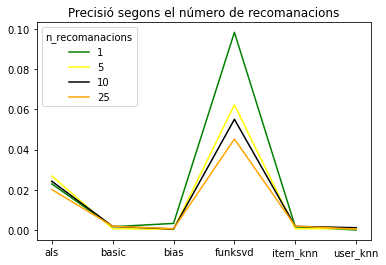

In [51]:
import pylab as pl

pl.plot(figsize=(10,20))
pl.plot(results_n_rec_1["precision"], color="green", label="1")
pl.plot(results_n_rec_5["precision"], color="yellow", label="5")
pl.plot(results_n_rec_10["precision"], color="black", label="10")
pl.plot(results_n_rec_25["precision"], color="orange", label="25")

pl.legend(loc='upper left', title="n_recomanacions")
pl.title("Precisió segons el número de recomanacions")

Podem observar clarament que amb el model funksvd, com més recomanacions de pel·lícules vulguem donar, tindrem menys precisió. Eliminem el plot d'aquest mètode de la gràfica per poder comparar amb més precisió els altres mètodes.

Precisió

Text(0.5, 1.0, 'Precisió segons el número de recomanacions [sense model funksvd]')

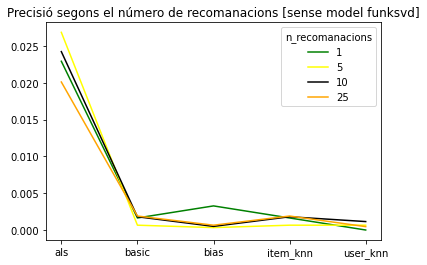

In [52]:
# Eliminem el model [funksvd]
results_n_rec_1_nofunk = results_n_rec_1.drop("funksvd", axis = 0)
results_n_rec_5_nofunk = results_n_rec_5.drop("funksvd", axis = 0)
results_n_rec_10_nofunk = results_n_rec_10.drop("funksvd", axis = 0)
results_n_rec_25_nofunk = results_n_rec_25.drop("funksvd", axis = 0)

# Plot de la precisió dels altres models
pl.plot(results_n_rec_1_nofunk["precision"], color="green", label="1")
pl.plot(results_n_rec_5_nofunk["precision"], color="yellow", label="5")
pl.plot(results_n_rec_10_nofunk["precision"], color="black", label="10")
pl.plot(results_n_rec_25_nofunk["precision"], color="orange", label="25")

# LLegenda i títol
pl.legend(loc='upper right', title="n_recomanacions")
pl.title("Precisió segons el número de recomanacions [sense model funksvd]")

En aquest cas, per norma general, també obtenim millor precisió com menys pel·lícules recomanem. Encara que això es veu exagerat amb el mètode als, per als altres, la precisió es manté bastant igual.

El mètode item_knn sembla ser el que menys varia amb el número de pel·lícules que vulguem recomanar.

Recall

Text(0.5, 1.0, 'Recall segons el número de recomanacions')

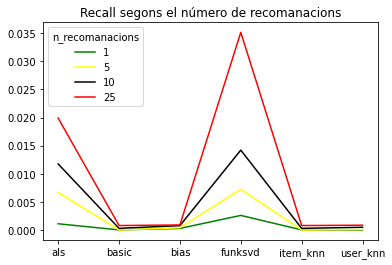

In [55]:
# Plot de la recall dels models
pl.plot(results_n_rec_1["recall"], color="green", label="1")
pl.plot(results_n_rec_5["recall"], color="yellow", label="5")
pl.plot(results_n_rec_10["recall"], color="black", label="10")
pl.plot(results_n_rec_25["recall"], color="red", label="25")

# LLegenda i títol
pl.legend(loc='upper left', title="n_recomanacions")
pl.title("Recall segons el número de recomanacions")

Pel que respecta al recall, el comportament és al contrari que la precisió. En augmentar el nombre de recomanacions que li demanem, també augmenta el recall. També elimino el paràmetre funksvd per observar millor la resta.

Text(0.5, 1.0, 'Recall segons el número de recomanacions [sense model funksvd]')

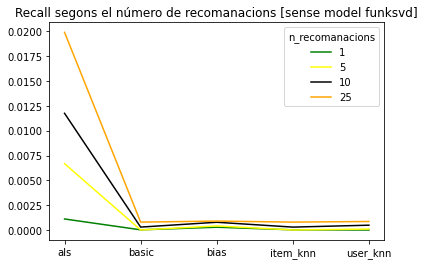

In [54]:
# Plot de la precisió dels altres models
pl.plot(results_n_rec_1_nofunk["recall"], color="green", label="1")
pl.plot(results_n_rec_5_nofunk["recall"], color="yellow", label="5")
pl.plot(results_n_rec_10_nofunk["recall"], color="black", label="10")
pl.plot(results_n_rec_25_nofunk["recall"], color="orange", label="25")

# LLegenda i títol
pl.legend(loc='upper right', title="n_recomanacions")
pl.title("Recall segons el número de recomanacions [sense model funksvd]")

Veiem el mateix comportament que hem vist abans amb la precisió, però en aquest cas els valors més alts són com més pel·lícules volem recomanar.

En aquest cas, el model que obté precisions semblants amb diferent nombre de recomanacions de pel·lícules és el mètode bias.

#### 4. Busca quins parametres afecten a cada model (com a mínim a dos), i intenta optimitzar-ne els resultats. Guarda la taula inicial i compara finalment la millora aconseguida en una 3a taula on hi mostris el percentatge de millora. [<b>*</b>]()

In [97]:
# Table 1

print("Table 1:")
table = results_user.groupby("Algorithm").mean()
t1 = pd.DataFrame(table.iloc[[0,2,4]])
display(t1)

t1_1 = t1[["nrecs", "Precision@5", "Recall@5", "Ndcg@5", "Recip@5"]]
t1_2 = t1[["mae", "rmse"]]

Table 1:


,nrecs,Recall@5,Ndcg@5,Recip@5,Precision@5,mae,rmse
Algorithm,,,,,,,
als,10.0,0.023361,0.021038,0.048470,0.023279,0.690164,0.849057
bias,10.0,0.000328,0.000460,0.001639,0.000328,0.706669,0.869718
item_knn,10.0,0.001639,0.001726,0.005792,0.001639,0.681473,0.845927


In [92]:
# Table 2

models = {
    "item_knn": item_knn.ItemItem(5, center = False), 
    "als": als.BiasedMF(10, reg = 0.3),
    "bias": Bias(damping = 150)
}

metriques = [
    [topn.recall, {'name':'Recall@5', 'k':5}],
    [topn.ndcg, {'name':'Ndcg@5', 'k':5}],
    [topn.recip_rank, {'name':'Recip@5', 'k':5}],
    [topn.precision, {'name':'Precision@5', 'k':5}], 
    [predict.mae, {'name':'Mae@5', 'k':5}],
    [predict.rmse, {'name':'Rmse@5', 'k':5}],
]

splitting = 'user'
results_user_2 = crossvalidar(data.ratings, models, splitting, metriques)

print("Table 2:")
t2 = results_user_2.groupby("Algorithm").mean()
display(t2)

t2_1 = t2[["nrecs", "Precision@5", "Recall@5", "Ndcg@5", "Recip@5"]]
t2_2 = t2[["mae", "rmse"]]

CROSSVALIDATION
Data: (100836, 4)
Models: ['item_knn', 'als', 'bias']
Splitting: user
Metrics: ['recall', 'ndcg', 'recip_rank', 'precision', 'mae', 'rmse']


[fold 5 of 5]: 100%|██████████| 3/3 [00:42<00:00, 14.06s/it, model=bias, train=97324, test=3512]


Table 2:


,nrecs,Recall@5,Ndcg@5,Recip@5,Precision@5,mae,rmse
Algorithm,,,,,,,
als,10.0,0.023033,0.021178,0.047787,0.022951,0.692033,0.850242
bias,10.0,0.189262,0.174607,0.339754,0.188525,0.778661,0.931875
item_knn,10.0,0.029836,0.029056,0.062814,0.029836,0.699437,0.874388


Per les dades nrecs, precision, recall, ndcg i recip_rank fem la segona taula menys la primera, ja que busquem que els valors siguin els més alts posibles.

In [99]:
t3_1 = (t2_1 - t1_1)*100
display(t3_1)

,nrecs,Precision@5,Recall@5,Ndcg@5,Recip@5
Algorithm,,,,,
als,0.0,-0.032787,-0.032787,0.014014,-0.068306
bias,0.0,18.819672,18.893443,17.414639,33.811475
item_knn,0.0,2.819672,2.819672,2.733040,5.702186


En aquest cas, per mae i rmse fem la resta de la primera taula menys la segona. Ja que aquí busquem valors els més petit possible.

In [100]:
t3_2 = (t1_2-t2_2)*100
display(t3_2)

,mae,rmse
Algorithm,,
als,-0.186877,-0.118518
bias,-7.199205,-6.215778
item_knn,-1.796386,-2.846126


In [101]:
print('Taula 3:')
t3_1.join(t3_2)

Taula 3:


,nrecs,Precision@5,Recall@5,Ndcg@5,Recip@5,mae,rmse
Algorithm,,,,,,,
als,0.0,-0.032787,-0.032787,0.014014,-0.068306,-0.186877,-0.118518
bias,0.0,18.819672,18.893443,17.414639,33.811475,-7.199205,-6.215778
item_knn,0.0,2.819672,2.819672,2.733040,5.702186,-1.796386,-2.846126


Veiem els resultats, aquí tenim els percentatges de millora dels diferents models. Veiem que el model que ha sortit més beneficiat és el *bias*. En aquest arribem a notar una millora del 33,81% en la mètrica recip_rank, cal destacar que la precisió augmenta quasi un 19% amb els paràmetres de la segona taula.

Per al mètode als podem afirmar que no obtenim cap millora amb la segona execució.

El mètode item_knn, també millora, però no tant com el model bias, així i tot, augmentem aproximadament un 3% de millora en totes les columnes excepte l'error, que augmenta lleugerament.